#**The rbpTransformer**
This code is a supporting material of the paper titled "rbpTransformer: A novel deep learning model for prediction of piRNA and mRNA bindings". The full code will be shared after the paper becomes published. An example trining and test results can be seen in this file.

#Run the trainer

In [ ]:
history = transformer.fit([mRNA_train, piRNA_train],
          y_train,
          batch_size=32,
          epochs=100,
          validation_data=([mRNA_val, piRNA_val], y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


2267/2267 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.5884 - loss: 0.6602 - val_accuracy: 0.6671 - val_loss: 0.6050
Epoch 2/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7004 - loss: 0.5701 - val_accuracy: 0.7177 - val_loss: 0.5454
Epoch 3/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7285 - loss: 0.5393 - val_accuracy: 0.7388 - val_loss: 0.5212
Epoch 4/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7435 - loss: 0.5206 - val_accuracy: 0.7657 - val_loss: 0.4836
Epoch 5/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7748 - loss: 0.4750 - val_accuracy: 0.7680 - val_loss: 0.4842
Epoch 6/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7949 - loss: 0.4433 - val_accuracy: 0.7893 - val_loss: 0.4518
Epoch 7/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8059 - loss: 0.4279 - val_accuracy: 0.7918 - val_loss: 0.4351
Epoch 8/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8071 - loss: 0.42

#Evaluate the model on test dataset and build the confusion matrix

756/756 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8703 - loss: 0.3013
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step
Precision: 0.887
Recall: 0.856
F1 Score: 0.871
Accuracy: 0.873


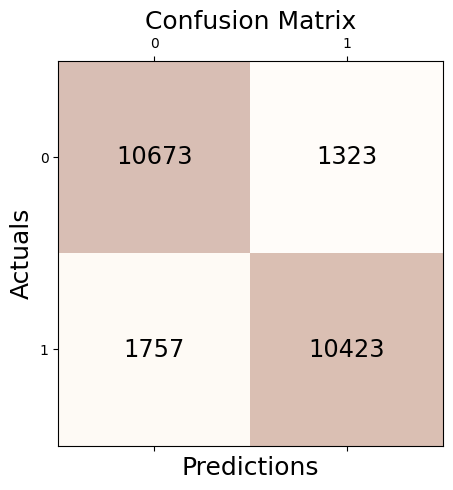

In [ ]:
loss, accuracy = transformer.evaluate([mRNA_test,piRNA_test], y_test)
y_pred = transformer.predict([mRNA_test,piRNA_test])

for i, item in enumerate(y_pred):
  if item >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
